In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run40-IGH-MOUSE-shared-clones.xlsx"
ptfile = "20201116-RUN40-DataSheet.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig,Sample
0,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S9,...,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh,A11-Bh_S9
1,N712_S502,A12-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S10,...,BCRh,A2,Spleen-day21,no,VERA,yes,no,no,mBCRh,A12-Bh_S10
2,N714_S502,A13-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S11,...,BCRh,A3,Spleen-day21,no,VERA,yes,no,no,mBCRh,A13-Bh_S11
3,N715_S502,A14-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S12,...,BCRh,A4,Spleen-day21,no,VERA,yes,no,no,mBCRh,A14-Bh_S12
4,N716_S502,A15-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S13,...,BCRh,A5,Spleen-day21,no,VERA,yes,no,no,mBCRh,A15-Bh_S13


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "IGH_MOUSE" in x]
myfiles.sort()
myfiles = myfiles[-4:]
myfiles

['cdr3-clones-VDJmouse-IGH_MOUSE-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,A11-Bh_S9,CARGEAMDYWGQGTSVT,48096
1,A11-Bh_S9,CTRGEAMDYWGQGTSVT,225
2,A11-Bh_S9,TSVT,145
3,A11-Bh_S9,CARGGAMDYWGQGTSVT,91
4,A11-Bh_S9,CAGGEAMDYWGQGTSVT,80


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
59533,BN314-Bh_S240,YARNYGDYWGQGTTLT,1
59534,BN314-Bh_S240,YARRLYYGKTDYFDYWGQGTTLT,1
59535,BN314-Bh_S240,YARSGTTVEDYWGQGTTLT,1
59536,BN314-Bh_S240,YWGQGTSVT,1
59537,BN314-Bh_S240,YYAMDYWGQGTSVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Species,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig
0,A11-Bh_S9,CARGEAMDYWGQGTSVT,48096,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,...,mouse,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh
1,A11-Bh_S9,CTRGEAMDYWGQGTSVT,225,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,...,mouse,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh
2,A11-Bh_S9,TSVT,145,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,...,mouse,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh
3,A11-Bh_S9,CARGGAMDYWGQGTSVT,91,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,...,mouse,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh
4,A11-Bh_S9,CAGGEAMDYWGQGTSVT,80,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,...,mouse,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,A1,A11-Bh_S9,CAGEEAMDYWGQGTSVT,1
1,A1,A11-Bh_S9,CAGGEALDYWGQGTSVT,1
2,A1,A11-Bh_S9,CAGGEAMDQWGQGTSVT,1
3,A1,A11-Bh_S9,CAGGEAMDYWGQGTSLT,1
4,A1,A11-Bh_S9,CAGGEAMDYWGQGTSVT,80


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,A11-Bh_S9,50192
1,A12-Bh_S10,39275
2,A13-Bh_S11,55843
3,A131-Bh_S19,47495
4,A132-Bh_S20,53840


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,A1,A11-Bh_S9,CAGEEAMDYWGQGTSVT,1,50192
1,A1,A11-Bh_S9,CAGGEALDYWGQGTSVT,1,50192
2,A1,A11-Bh_S9,CAGGEAMDQWGQGTSVT,1,50192
3,A1,A11-Bh_S9,CAGGEAMDYWGQGTSLT,1,50192
4,A1,A11-Bh_S9,CAGGEAMDYWGQGTSVT,80,50192


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
59533,BN4,BN131-Bh_S114,YARSEDGSSSYWYFDVWGSGTTVT,1,2056
59534,BN4,BN131-Bh_S114,YARSGGAYFDYWGQGTTLT,1,2056
59535,BN4,BN131-Bh_S114,YFDVWGTGTTVT,1,2056
59536,BN4,BN131-Bh_S114,YWGQGTTLT,1,2056
59537,BN4,BN131-Bh_S114,YYYAMDYWGQGTSVT,1,2056


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,A1,A11-Bh_S9,CAGEEAMDYWGQGTSVT,1,50192,0.001992
1,A1,A11-Bh_S9,CAGGEALDYWGQGTSVT,1,50192,0.001992
2,A1,A11-Bh_S9,CAGGEAMDQWGQGTSVT,1,50192,0.001992
3,A1,A11-Bh_S9,CAGGEAMDYWGQGTSLT,1,50192,0.001992
4,A1,A11-Bh_S9,CAGGEAMDYWGQGTSVT,80,50192,0.159388


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['A11-Bh_S9',
 'A131-Bh_S19',
 'A138-Bh_S68',
 'A143-Bh_S115',
 'A150-Bh_S241',
 'A16-Bh_S35',
 'A21-Bh_S61',
 'A26-Bh_S131',
 'A46-Bh_S87',
 'A51-Bh_S126']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,A131-Bh_S19,A11-Bh_S9,99.755764,99.234938
1,A138-Bh_S68,A11-Bh_S9,99.565217,97.073239
2,A11-Bh_S9,A143-Bh_S115,99.218999,92.975375
3,A150-Bh_S241,A11-Bh_S9,99.442975,98.850414
4,A16-Bh_S35,A11-Bh_S9,99.682567,99.428196


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,A131-Bh_S19,A11-Bh_S9,99.755764,99.234938,A1,A1
1,A138-Bh_S68,A11-Bh_S9,99.565217,97.073239,A1,A1
2,A150-Bh_S241,A11-Bh_S9,99.442975,98.850414,A1,A1
3,A16-Bh_S35,A11-Bh_S9,99.682567,99.428196,A1,A1
4,A21-Bh_S61,A11-Bh_S9,99.268293,96.945728,A1,A1


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,7220,AN131-Bh_S24,A14-Bh_S12,99.956869,99.945415,AN1,A4
1,7548,A14-Bh_S12,AN134-Bh_S43,99.958011,99.944864,A4,AN4
2,7672,AN133-Bh_S42,AN20-Bh_S60,99.939057,99.933342,AN3,AN5
3,7478,A14-Bh_S12,AN133-Bh_S42,99.959411,99.932709,A4,AN3
4,7165,AN20-Bh_S60,A18-Bh_S37,99.934892,99.932058,AN5,A3


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,7220,AN131-Bh_S24,A14-Bh_S12,99.956869,99.945415,AN1,A4,different
1,7548,A14-Bh_S12,AN134-Bh_S43,99.958011,99.944864,A4,AN4,different
2,7672,AN133-Bh_S42,AN20-Bh_S60,99.939057,99.933342,AN3,AN5,different
3,7478,A14-Bh_S12,AN133-Bh_S42,99.959411,99.932709,A4,AN3,different
4,7165,AN20-Bh_S60,A18-Bh_S37,99.934892,99.932058,AN5,A3,different


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run40-IGH-MOUSE-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,7220,AN131-Bh_S24,A14-Bh_S12,99.956869,99.945415,AN1,A4,different
1,1,7548,A14-Bh_S12,AN134-Bh_S43,99.958011,99.944864,A4,AN4,different
2,2,7672,AN133-Bh_S42,AN20-Bh_S60,99.939057,99.933342,AN3,AN5,different
3,3,7478,A14-Bh_S12,AN133-Bh_S42,99.959411,99.932709,A4,AN3,different
4,4,7165,AN20-Bh_S60,A18-Bh_S37,99.934892,99.932058,AN5,A3,different


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,7220,AN131-Bh_S24,A14-Bh_S12,99.956869,99.945415,AN1,A4,different,AN131-Bh_S24->A14-Bh_S12,blue
1,1,7548,A14-Bh_S12,AN134-Bh_S43,99.958011,99.944864,A4,AN4,different,A14-Bh_S12->AN134-Bh_S43,blue
2,2,7672,AN133-Bh_S42,AN20-Bh_S60,99.939057,99.933342,AN3,AN5,different,AN133-Bh_S42->AN20-Bh_S60,blue
3,3,7478,A14-Bh_S12,AN133-Bh_S42,99.959411,99.932709,A4,AN3,different,A14-Bh_S12->AN133-Bh_S42,blue
4,4,7165,AN20-Bh_S60,A18-Bh_S37,99.934892,99.932058,AN5,A3,different,AN20-Bh_S60->A18-Bh_S37,blue


Wrote run40-IGH-MOUSE-shared-clones-all.pdf to disk


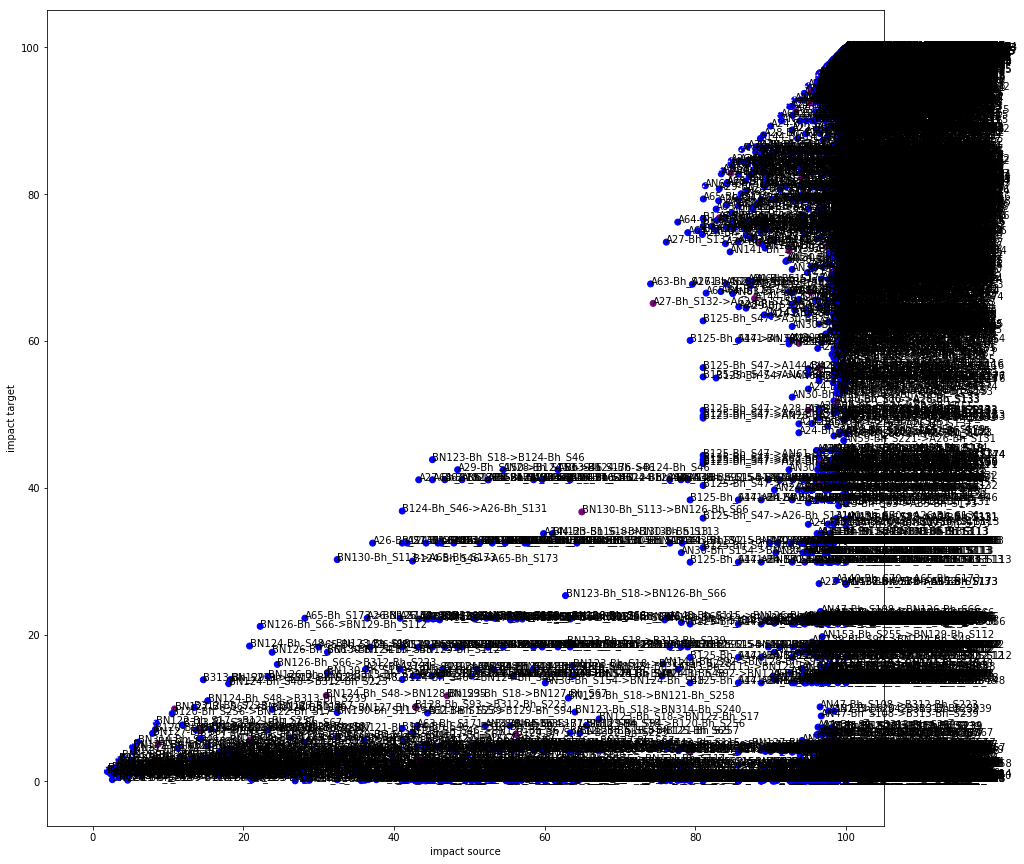

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,AN131-Bh_S24,A14-Bh_S12,99.956869,99.945415,different,AN131-Bh_S24->A14-Bh_S12,blue
1,1,A14-Bh_S12,AN134-Bh_S43,99.958011,99.944864,different,A14-Bh_S12->AN134-Bh_S43,blue
2,2,AN133-Bh_S42,AN20-Bh_S60,99.939057,99.933342,different,AN133-Bh_S42->AN20-Bh_S60,blue
3,3,A14-Bh_S12,AN133-Bh_S42,99.959411,99.932709,different,A14-Bh_S12->AN133-Bh_S42,blue
4,4,AN20-Bh_S60,A18-Bh_S37,99.934892,99.932058,different,AN20-Bh_S60->A18-Bh_S37,blue


In [ ]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

Wrote run40-IGH-MOUSE-shared-clones-different-ids.pdf to disk


## Calculate common/public clones

In [ ]:
df.head()

In [ ]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [ ]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

In [ ]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

In [ ]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

In [ ]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

In [ ]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")